# Algèbre linéaire et flux

In [1]:
import numpy as np # numpy est la bibliothèque de calcul numérique en python. 
import matplotlib.pyplot as plt # Matplotlib permet de tracer des graphes.
# la commande jupyter ci-dessous permet d'afficher les graphes de matplotlib directement dans le notebook.
%matplotlib inline
from matplotlib.patches import Polygon # objet permettant de tracer des polygones
plt.rc('text', usetex=True) # Configure matplotlib pour utiliser TeX pour le rendu des textes 

# Une histoire de flux

Le transport des protéines dans la cellule eukaryote est un phénomène complexe faisant appel à de nombreux compartiments (RE, noyau, Golgi, vésicules, mitochondries, plastes, membrane) et a des flux très controlés qui les relient (voir dessin à gauche). 

On se propose d'écrire un modèle de ce transport dans le cadre d'une expérience de pensée assez simple: imaginons que nous présentions à une cellule un certain type d'acide aminé marqués. Ces Acides aminés sont par ailleurs identiques à leur équivalents naturels et sont donc utilisés dans la biosythèse des protéines. On fait l'hypothèse qu'il sont intégrés uniformément dans toutes les protéines. On souhaite décrire leur localisation dans les différents compartiments cellulaires par un modèle mathématique. 


Nous allons réaliser un modèle linéaire en compartiments. Pour cela on doit identifier des compartiments et des flux qui les relient. 

On peut résumer les informations de la littérature (dessin à gauche) en un graphe (représenté à droite),
![transport.svg](transport.svg)

Voici une version plus complète, avec la matrice d'adjacence du graphe:
![](transport2.svg)

Construire ce modèle commence comme souvent par la réalisation d'un **bilan de matière** pour compartiment dans un intervalle de temps $\Delta_t$:

$$\Delta \text{protéines} = + \text{entrant} - \text{sortant}$$

Pour être plus précis, il y a deux façons d'ajouter ou de retirer des protéines dans un compartiment  : 

$$\Delta \text{protéines} = \text{flux entrant} + \text{synthèse} - \text{flux sortant} - \text{dégradation}$$

On note $u_{t,i}$ la quantité de protéines dans le compartiment $i$ à l'instant $t$. On souhaite donc construire un sytème d'équations de la forme:

$$u_{t+1} = f(u_t)$$

On va faire un certain nombre d'hypothèses: 

- 1. La quantité de protéines transférées d'un compartiment à l'autre est proportionelle à la quantité de protéines dans le compartiment de départ et indépendante de la quantité de protéines dans le compartiment d'arrivée. Le coefficient de proportionalité est noté $\phi_{ij}$ pour les compartiments $i$ de départ et $j$ d'arrivée.
- 2. La quantité de protéines dégradée (resp synthétisée) dans un compartiment est proportionelle aux nombre de protéines présentes dans le compartiment. Le coefficient de probabilité est noté $d_i$ (resp $s_i$) le compartiment $i$.

Attention à la conservation de la matière ! Il faut que $ d_i  + \sum_i \phi_{ij} \leq 1$

Ces hypothèses (très simplifiées) se transcrivent mathématiquement en: *$f(v)$ est une combinaison linéaire des éléments de v*. Ce qui permet d'écrire $f$ comme un produit matriciel. On parle de **modèle linéaire** (dans les TD suivants nous pourrons complexifier le modèle en ajoutant des termes non linéaires). 

\begin{align}
(f(v))_j &= s_j v_j - d_j v_j + \sum_{i=1}^N \phi_{ij} v_i - \phi_{ji} v_j \\
(f(v))_j &= \sum_{i=1}^N \phi_{ij} v_i + \left (1 + s_j - d_j - \sum_{i=1}^N \phi_{ji} \right) v_j \\
(f(v))_j &:= \sum_{i=1}^N A_{ij} v_i \\
f(v) &= A \circ v 
\end{align}

Ainsi, la matrice $A$ a pour élément: 

\begin{equation}
a_{ij} = \begin{cases}
\phi_{ij}  \; &\text{si }i\neq j,\\
1 + s_i - d_i - \sum_{k=1}^N \phi_{ik} \; &\text{sinon.}
\end{cases}
\end{equation}

Le modèle que l'on obtient peut s'écrire: 

\begin{equation}
\begin{cases}
u_t = A u_{t-1}\\
u_0 = u \in \mathbb R^N
\end{cases}\end{equation}

C'est un modèle: 

- **Déterministe**, c'est à dire que le comportement du modèle est entièrement déterminé par ses paramètres et ses conditions initiales. Il fait partie de la famille des **Systèmes Dynamiques**.
- **À temps discret**, l'espace du temps est $\mathbb N_+$.
- **Autonome**, le temps n'apparait pas comme variable dans l'équation de la dynamique.
- Dont l'**Espace d'état** est $E = \mathbb R^N$.
- Dont l'**Équation de la dynamique** est une équation linéaire: $u_t = A u_{t-1}$
- Dont les **Conditions initiales** sont le vecteur $u_0 \in E$
- Dont une trajectoire est la **suite** $(u_n)_{n\geq0} \in E^{\mathbb N_+}$ 

Il est possible de donner l'expression analytique du terme générique de la trajectoire de ce modèle (la preuve se fait par réccurence):

$$\forall n>0, \; u_n = A^n u_0 $$ 

# Quelques rappels sur les matrices

Une matrice $A$ de taille $m \times n$ à coefficient dans $\mathbb K$ est un ensemble d'éléments de $\mathbb K$ ordonnés en $m$ lignes et $n$ colonnes.On note $a_{ij}$ l'élément à la $i\text{-ème}$ ligne et $k\text{-ième}$ colonne.

\begin{equation} 
A = (a_{ij})_{1\leq i\leq m; 1 \leq j \leq n} 
\end{equation}

On peut aussi commencer l'indexation à 0 pour coller à la représentation informatique: $A = (a_{ij})_{0 \leq i < m; 0 \leq j < n}$

Example en taille $3 \times 3$:

\begin{equation}
A = \left [ \begin{array}{ccc} a_{00} & a_{01} & a_{02} \\
                               a_{10} & a_{11} & a_{12} \\
                               a_{20} & a_{21} & a_{22} \\
                               \end{array} \right ] 
\end{equation}

In [2]:
# Les matrices peuvent être représentées par des objets de type numpy.array. 
# Créér un array peut se faire à partir d'une liste de liste:
A = np.array([[10,6,6],
              [8,2,4],
              [8,4,2]])

# Accéder à $a_{ij}$ se fait par indexation:
A[0,1] # => 6

# Il existe des constructeurs pour des matrices particulières:
I = np.identity(3) # Matrice identité de taille 3
N = np.zeros((3,3)) #Matrice de zeros de taille 3
X,Y = np.meshgrid([1,2,3],[1,2,3]) # Matrices donnant le produit cartésien de deux vecteurs. 

In [3]:
x = np.array([1,2,3])
# Le produit matriciel pour les np.array peut se faire avec la méthode .dot:
A.dot(x) # Seule possibilité pour Python < 3.5
# Ou l'opérateur @:
A @ x #Python >= 3.5
assert np.all(A.dot(x) ==  A @ x)

In [4]:
### Vecteurs lignes, vecteurs colonnes... ###
# Le produit matriciel n'est défini que pour des matrice de dimensions compatibles. 
# Exemple, le produit: A * B necessite que B ait autant de colonnes que A ait de lignes. 
# Le résultat est une matrice carrée. 
# (M,N) * (K,M) -> (M,M)

# Par défaut les array numpy de dimension 1 sont orientés à chaque opération pour que le produit matriciel fonctionne:
x = np.array([1,2,3])
print("value: {}, dim: {}, shape: {}, A@x: {}, x@A {}".format(x, x.ndim, x.shape, A@x, x@A))

# Ainsi, Pour deux arrays de dimension 1, @ est le produit scalaire.
x@x # équivalent à <x,x> ou x^T * x si x est un vecteur colonne. 

value: [1 2 3], dim: 1, shape: (3,), A@x: [40 24 22], x@A [50 22 20]


14

In [5]:
# La syntaxe np.newaxis permet d'augmenter sa dimension. Maintenant, l'orientation ligne ou colonne est importante.
b = x[:,np.newaxis] # `b` est un vecteur colonne (3 lignes, 1 colonne)
print("value: {}, dim: {}, shape: {}, A@b: {}".format(b, b.ndim, b.shape, A@b))

c = x[np.newaxis,:] # `c` est un vecteur ligne (1 ligne, 3 colonnes)
print("value: {}, dim: {}, shape: {}, b@A:{}".format(c, c.ndim, c.shape, c@A))

c@b #=> un scalaire (produit scalaire des deux vecteurs <b,c>).
b@c #=> une matrice 3x3. 

value: [[1]
 [2]
 [3]], dim: 2, shape: (3, 1), A@b: [[40]
 [24]
 [22]]
value: [[1 2 3]], dim: 2, shape: (1, 3), b@A:[[50 22 20]]


array([[1, 2, 3],
       [2, 4, 6],
       [3, 6, 9]])

## Simuler des trajectoires
**Exercice** : Simulez la trajectoire de ce modèle simplifié. Tracer le graphe du contenu de chaque compartiment au cours du temps. Quels types de trajectoires pouvez vous obtenir ?

![](3comp.svg)


\begin{equation}
\mathbf s =  \left [ \begin{array}{c} s\\0\\0 \end{array} \right ] , \;
\mathbf d =  \left [ \begin{array}{c} 0\\0\\d\end{array} \right ] , \;
\phi = \left [ \begin{array}{ccc} 0 & r & 0 \\
                                  f & 0 & g \\
                                  m & e & 0 \\
                               \end{array} \right ] 
\end{equation}


In [6]:
def transport_3comp(f=.4,m=.2,r=.5,e=.4,g=.1,s=0, d=0):
    """ Matrice de la dynamique du modèle à 3 compartiments.
    Args: 
        f(float): flux golgi->endo.
        m(float): flux golgi->surface.
        r(float): flux endo->golgi.
        e(float): flux endo->surface.
        s(float): synthese dans le golgi.
        d(float): degradation a la surface
    Returns: un np.array de taille 3x3. 
    """
    # Programmation defensive ! 
    # Les flux sortants doivent être <100% 
    # pour assurer la conservation de la matière. 
    assert f+m <= 1, 'flux de sortie du golgi >100%'
    assert e+r <= 1, 'flux de sortie des endosomes >100%'
    assert g+d <= 1, 'flux de sortie de la surface cellulaire >100%'
    flux = np.array([[1-f-m+s,r,0],
                    [f,1-e-r,g],
                    [m,e,1-g-d]])
    return flux

def simulate(A, u0, T=10):
    """Simule le modèle u_n = A^n u_0
    Args:
        A (np.array): Matrice de la dynamique
        u0 (iterable): Condition initiale
        T (int): Nombre de pas de temps
    Renvoie la trajectoire sous forme de np.array: traj[n,i] = (u_n)_i
    """
    traj = [u0, ]
    for t in range(T):
        traj.append(A@traj[-1])
    return np.array(traj)

def display_traj3comp(traj, ax=None, labels=['Golgi','Endosomes', 'Surface']):
    """Affiche la trajectoire du modèle de transport à 3 compartiment"""
    if ax is None:
        fig, ax = plt.subplots(figsize=(12,4))
    ax.plot(traj)
    ax.legend(labels)
    for t in traj.T:
        ax.scatter(np.arange(len(t)),t)

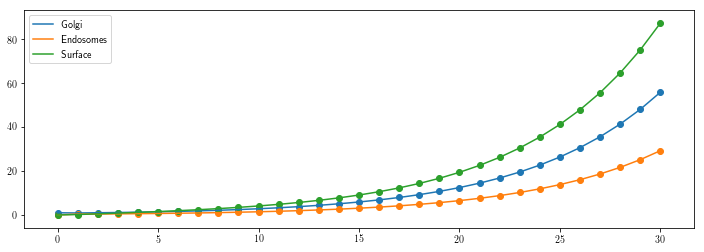

In [7]:
# Matrice de la dynamique
A = transport_3comp(s=0.5)

# Conditions initiales
u0 = [1,0,0]

# Temps final
T = 30

# Simulation.
traj = simulate(A, u0, T)

# Affichage
display_traj3comp(traj)

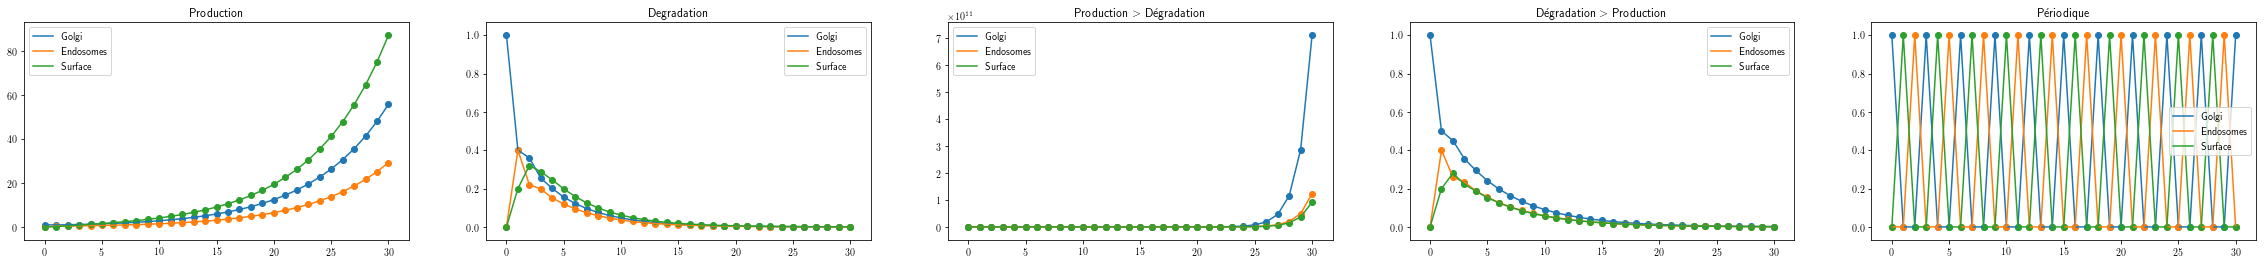

In [8]:
# Créer une liste avec tous les jeux de paramètres à tester.
parametres = [("Production",{'s':0.5}), 
              ("Degradation",{'d':0.5}),
              ("Production $>$ Dégradation",{"s":2, 'd':0.5}),
              ("Dégradation $>$ Production",{"s":0.1, 'd':.8}),
              ("Périodique",{'m':1,'g':1,'r':1,'f':0,'e':0}),]

# Créer la figure
fig,axes = plt.subplots(1,len(parametres), figsize=(8*len(parametres),4))

# Itérer sur les jeux de paramètres et les subplots (objets ax).
for (title,p),ax in zip(parametres, axes):
    A = transport_3comp(**p)
    traj = simulate(A, u0, T)
    display_traj3comp(traj, ax=ax)
    ax.set(title=title)

# Un peu d'algèbre linéaire

## Les matrices $2\times 2$ comme endomorphismes sur le plan

Pour encore simplifier et essayer de se construire une intuition géométrique on va passer à des matrices $2 \times 2$. 

![](2comp.svg)


\begin{equation}
A = \left [ \begin{array}{cc} a_{00} & a_{01} \\
                               a_{10} & a_{11}  \\
                               \end{array} \right ] 
\end{equation}

### Représenter l'effet d'une matrice

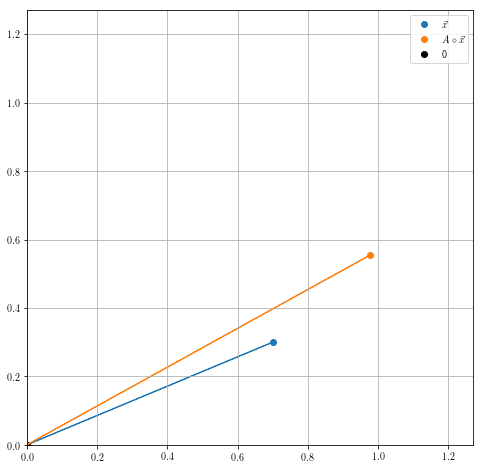

In [9]:
A = np.array([[1.2,0.46],
              [.45,0.8]])
x = [0.7,0.3]

# Voyons, graphiquement, l'effet d'un produit matriciel sur un point:
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(*x, label=r'$\vec{x}$')
ax.scatter(*A@x, label=r'$A \circ \vec{x}$')
ax.scatter(0,0, label=r'0',color='k')
ax.arrow(0,0,*x,color='C0')
ax.arrow(0,0,*A@x,color='C1')

ax.set(xlim=(0,1.3*np.max(A@x)), ylim=(0,1.3*np.max(A@x)))
ax.legend()
ax.grid(1)

Une matrice de taille $n$ est un endomorphisme de $\mathbb R^n$ vers $\mathbb R^n$. À tout antécédent  $x \in \mathbb R^n$ est associé une unique image $Ax\in \mathbb R^n$ . Dans $\mathbb R^2$, on peut regarder l'effet sur tout l'espace en représentant le champ de vecteur associé. 

**Comment représenter une application en fonction de ses espace de départ et d'arrivée**

| Espace de départ | Espace d'arrivée | Représentation graphique | Matplotlib |
|--
|$\mathbb R$| $\mathbb R$ | courbe, points | `plt.plot`, `plt.scatter`
|$\mathbb R^2$| $\mathbb R$ | contour, surface | `plt.contour`, `plt.contourf`, `plt.imshow`, [`axes3D.plot_surface`](https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html)
|$\mathbb R^2$| $\mathbb R^2$ | Champ de vecteur, écoulement | `plt.quiver`, `plt.streamplot` |

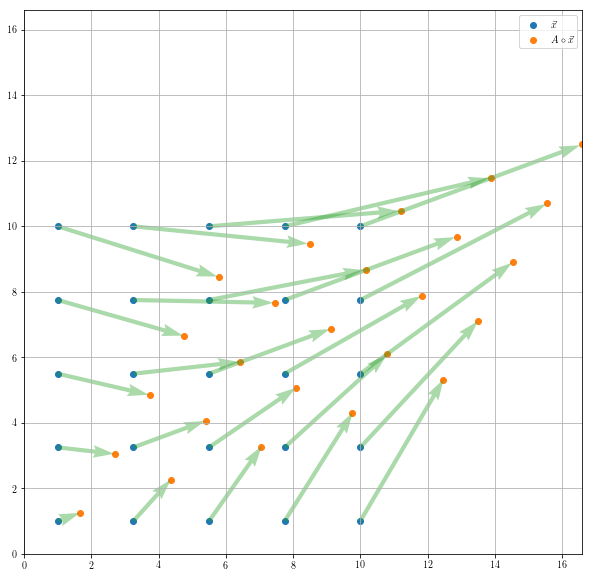

In [10]:
lspace = np.linspace(1,10,5)
fig, ax = plt.subplots(figsize=(10,10))

# Meshgrid donne le produit cartésien des deux vecteurs.
# Et donc de la grille sur laquelle on veut appliquer A.
X,Y = np.meshgrid(lspace,lspace)

# np.vectorize permet de donner à une fonction quelquonque (ici le lambda)
# des capacités de broadcasting (application à tous les éléments).
# Par défaut vectorize attend une fonction qui prend des scalaires et retourne des scalaires.
# Si ce n'est pas le cas il faut préciser la signature. Ici la fonction prend deux scalaires "(),()" et
# retourne un array de taille 2 "->(2)"
f = np.vectorize(lambda x,y: A@[x,y], signature='(),()->(2)')
U = f(X,Y) # On applique la fonction à tous les éléments de X,Y ! 

# L'attribut `flat` d'un array renvoie une vue de l'array "applatie", c'est à dire de dimension 1.
ax.scatter(X.flat, Y.flat, color='C0', label=r'$\vec{x}$')
ax.scatter(U[:,:,0].flat,  U[:,:,1].flat, color='C1', label=r'$A \circ \vec{x}$')
ax.quiver(X, Y, U[:,:,0]-X, U[:,:,1]-Y, angles='xy', units='xy', scale=1, color='C2', alpha=0.4)
ax.set(xlim=(0,np.max(U)),ylim=(0,np.max(U)))
ax.legend()
ax.grid()

Une matrice $(2\times2)$ est donc une transformation linéaire du plan. On représenter l'effet d'une matrice sur un point, sur un nuage de point, mais aussi sur un volume (dans le plan c'est un polygone). Nous allons représenter l'effet d'une matrice sur le carré unité.

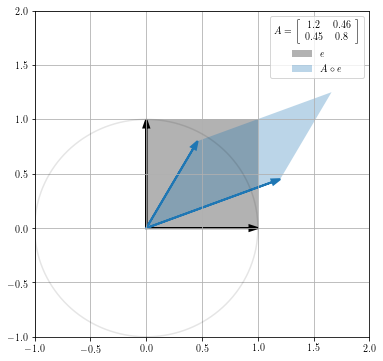

In [11]:
def display_transform(A, ax=None, title=None, name='A'):
    """Affiche l'effet de la matrice A sur le carré unité"""
    if ax is None:
        fig, ax = plt.subplots(figsize=(6,6))
    if title is not None:
        ax.set(title=title)
        
    # unit square
    square = [(0,0),(0,1),(1,1),(1,0)]

    # Plot the canoncial basis and its image 
    arrow ={'linewidth':2, 'head_width':0.05, 'length_includes_head':True}
    ax.arrow(0, 0, 0, 1, color='k', label='e', **arrow)
    ax.arrow(0, 0, 1, 0, color='k', **arrow)
    ax.arrow(0, 0, *A@np.array([0,1]), color='C0' , **arrow)
    ax.arrow(0, 0, *A@np.array([1,0]), color='C0', label=name+'e', **arrow)
        
    # Plot the unit square and its image
    Asquare = [A@x for x in square]
    p1=ax.add_patch(Polygon(square, facecolor='k', alpha=0.3))
    p2=ax.add_patch(Polygon(Asquare, facecolor='C0', alpha=0.3))
    
    ## Plot a unit circle
    u = np.linspace(-1,1,1000)
    ax.plot(u, np.sqrt(1-u**2),color='k',alpha=0.1)
    ax.plot(u, -np.sqrt(1-u**2),color='k',alpha=0.1)
    
    # Plot a grid 
    ax.grid(1)
    
    # Informative legend
    tex =  ('${}'.format(name)
            +r' = \left [ \begin{array}{cc}'
            + r"{0[0][0]:2} & {0[0][1]:2} \\ {0[1][0]:2} & {0[1][1]:2}".format(A) 
            + r'  \end{array} \right ] $')
    ax.legend((p1,p2),('$e$','${} \circ e$'.format(name)), title=tex)
    
    # Set axis limits
    ax.set(xlim=(np.floor(np.min([np.min(Asquare),-1])),
                 np.ceil(np.max([np.max(Asquare),1]))), 
           ylim=(np.floor(np.min([np.min(Asquare),-1])),
                 np.ceil(np.max([np.max(Asquare),1]))))
    return ax

display_transform(A);

Remarquez que les colonnes d'une matrice donne la position de l'image de chaque vecteur de la base canonique (flèches bleues et noires):

\begin{equation}
\left [ \begin{array}{cc} a & b \\
c & d \\
\end{array} \right ] \circ 
\left [ \begin{array}{c} 1  \\
0 \\
\end{array} \right ] = \left [ \begin{array}{c} a  \\
c \\
\end{array} \right ] 
\end{equation}

\begin{equation}
\left [ \begin{array}{cc} a & b \\
c & d \\
\end{array} \right ] \circ 
\left [ \begin{array}{c} 0  \\
1 \\
\end{array} \right ] = \left [ \begin{array}{c} b  \\
d \\
\end{array} \right ] 
\end{equation}


### Produit Matriciel : Composer les transformations

**Multiplier des matrices** revient à composer les transformations, c'est à dire les appliquer les unes après les autres (en partant de la plus intérieure): $B \circ C$ revient à appliquer la transformation $C$, puis $B$.

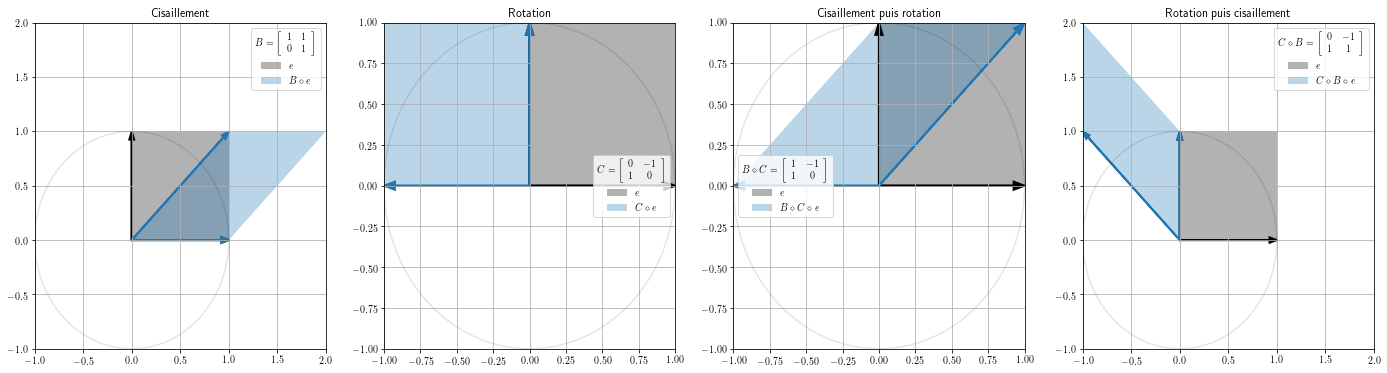

In [12]:
B = np.array([[1,1],
              [0,1]])  # Cisaillement 
C = np.array([[0,-1],
             [1,0]]) # Rotation de 180 degrés.

fig, ax = plt.subplots(1,4,figsize=(24,6))
display_transform(B, ax[0], title='Cisaillement', name='B')
display_transform(C, ax[1], title='Rotation', name='C') 
display_transform(B@C, ax[2], title='Cisaillement puis rotation', name=r'B\circ C')
display_transform(C@B, ax[3], title='Rotation puis cisaillement', name=r'C\circ B');

Cela illustre pourquoi la multiplication de matrice n'est **pas commutative** en général. Appliquer la rotation *puis* le cisaillement n'est pas équivalent à appliquer le cisaillement *puis* la rotation. D'où:

$$BC \neq CB $$

### Inverser une matrice : chercher la transformation inverse

**Inverser une matrice** revient à trouver la transformation qui annule la transformation associée à cette matrice. Si on garde en tête le fait que la multiplication est une composition des transformations (on en applique l'une puis l'autre) on comprend bien pourquoi: 
$$A^{-1}A = AA^{-1} = I$$ 

Numériquement on utilise `np.linalg.inv`.

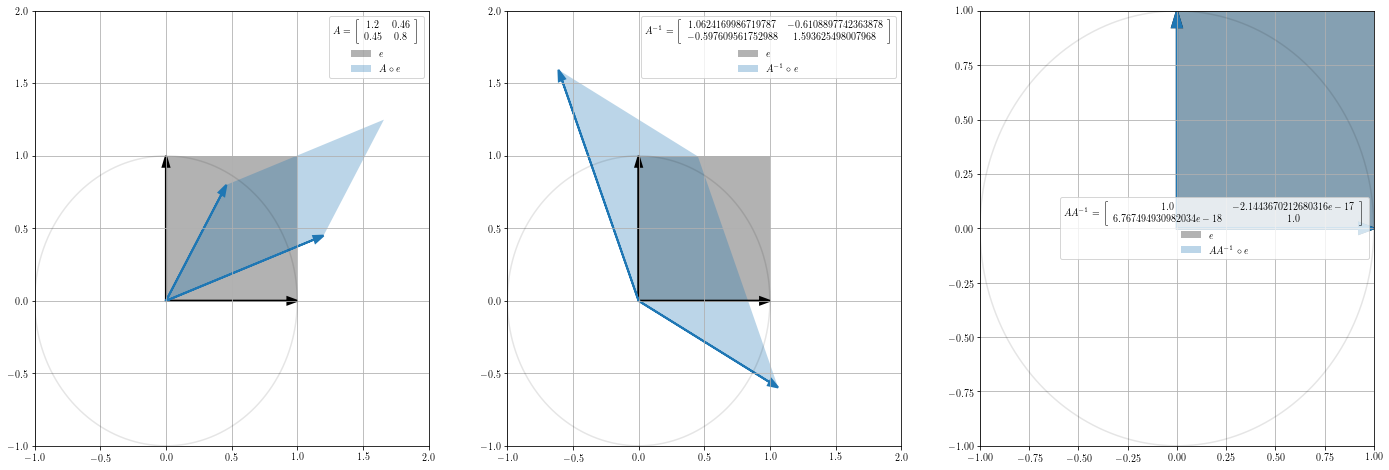

In [13]:
invA = np.linalg.inv(A) # Inverse numériquement la matrice. 

fig, ax = plt.subplots(1,3,figsize=(24,8))
display_transform(A, ax[0])
display_transform(invA, ax[1], name='A^{-1}')
display_transform(A@invA, ax[2], name='AA^{-1}'); # Remarquez l'erreur numérique ce n'est pas exactement I

L'aire de l'image du carré unité est égal à la **valeur absolue du déterminant**. (Exercice: le prouver dans le cas 2x2), le déterminant est négatif si l'orientation du carré unité à changé (les vecteurs se sont croisés).

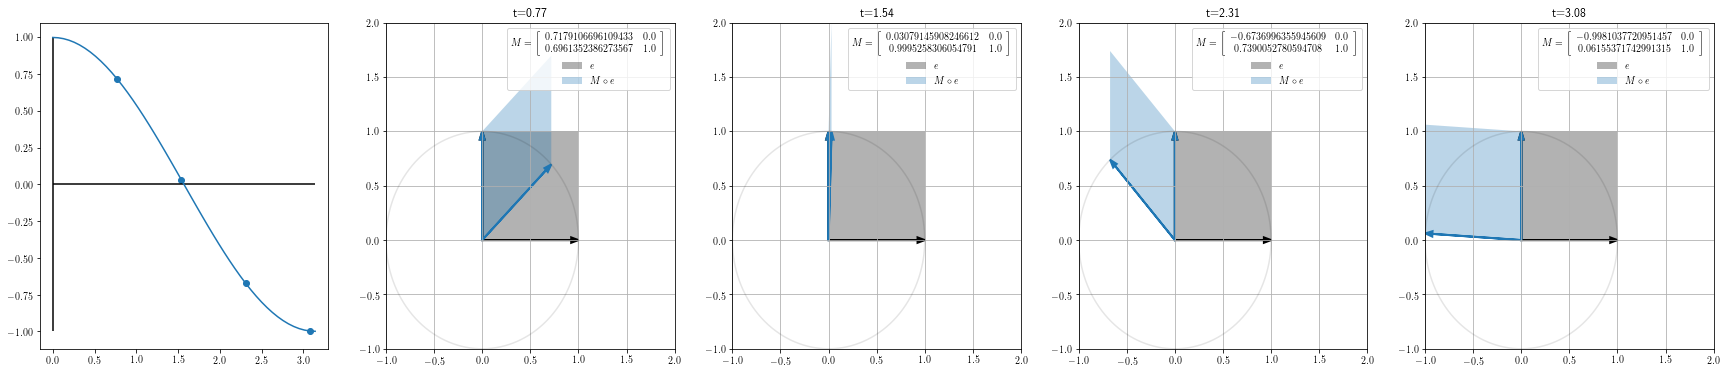

In [14]:
# Regardons quelques matrices et leur déterminant, quand le volume du carré unité passe par 0. 
fig, axes = plt.subplots(1,5, figsize=(5*6,6))
theta = np.linspace(0, np.pi)
j = 0
dots = []
detlist = []
for i,t in enumerate(theta): 
    # Cette famille de matrice ne change pas le second vecteur de la base canonique,
    # et fait décrire le cercle unité au premier.
    M = np.array([[np.cos(t),0],
                  [np.sin(t),1]])
    # np.linalg.det permet de calculer le déterminant. 
    detlist.append(np.linalg.det(M))
    
    if i>1 and i%(len(theta)//4) == 0:
        t = np.round(t, 2)
        M = np.array([[np.cos(t),0],
              [np.sin(t),1]])
        j+=1
        display_transform(M, axes[j], title='t={}'.format(t), name='M')
        dots.append((t,np.linalg.det(M)))
        
axes[0].plot(theta, detlist)
axes[0].scatter(*zip(*dots))
axes[0].hlines(0, theta.min(),theta.max())
axes[0].vlines(0,-1,1)


Cela illustre bien pourquoi il est **impossible d'inverser une matrice dont le déterminant est nul**, en effet, cela signifie que les volumes (ici les aires) sont "écrasés" en un ensemble de dimension inférieure (ici segment ou point). Il est impossible de trouver une transformation linéaire qui permette de retrouver le volume de départ à partir du segment.

### Diagonaliser une matrice: Chercher la directions dans laquelle la transformation est une dilatation

Une matrice est **diagonalisable** si la transformation associée est une dilatation non homogène dans une certaine base.

Par définition les vecteurs propres d'une matrice sont des vecteurs $u$ pour lequels 

$$Au = \lambda u $$

Ou $\lambda$ est la valeur propre associée au vecteur propre $u$. 

Diagonaliser la matrice revient à trouver $P$ (inversible) et $D$ (diagonale) telles que: 
 
$$ A = P^{-1} D P $$

Les colonnes de $P$ sont les vecteurs propres de $A$ et les valeurs de la diagonale de $D$ sont les valeurs propres associées. 

Cela signifie que la transformation $A$ est équivalente à: 
   1. Transformer le plan tel que les vecteurs de la base canonique coïncident avec les vecteurs propres de la matrice (c'est à dire appliquer $P$).
   2. Réaliser la dilatation non homogène: agrandir ou réduire les vecteurs de la base en les multipliant par un scalaire (c'est à dire appliquer $D$).
   3. Re-transformer le plan pour revenir à la base canonique (en faisant la transformation inverse à $P$, c'est à dire appliquer $P^{-1}$). 

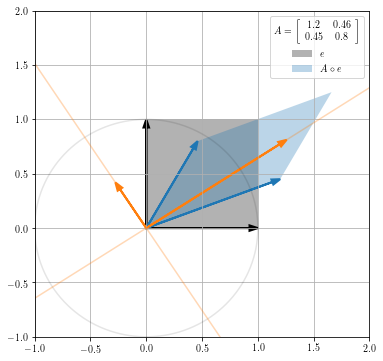

In [15]:
def display_eigenvectors(A, ax=None):
    """Display eigenvectors of the matrix A"""
    if ax is None:
        ax = plt.gca()

    # Compute eigenvectors
    eigval, eigvect = np.linalg.eig(A)
    
    # Plot eigenvectors
    # If they have complex component, it is impossible to plot this way and a 
    # type error will be raised.
    arrow ={'linewidth':2, 'head_width':0.05, 'length_includes_head':True}
    try:
        ax.arrow(0, 0, eigval[0]*eigvect[0,0], eigval[0]*eigvect[1,0], color='C1', label='e', **arrow)
        u = ax.arrow(0, 0,  eigval[1]*eigvect[0,1],eigval[1]* eigvect[1,1], color='C1', **arrow)
    except TypeError:
        pass
    
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    xmax = 10*np.max([ax.get_xlim(),ax.get_ylim()])
    try:
        ax.plot([0,eigvect[0,0]*xmax],[0,eigvect[1,0]*xmax], color='C1',alpha=.3)
        ax.plot([0,eigvect[0,1]*xmax],[0,eigvect[1,1]*xmax], color='C1',alpha=.3)
        ax.plot([0,-eigvect[0,0]*xmax],[0,-eigvect[1,0]*xmax], color='C1',alpha=.3)
        ax.plot([0,-eigvect[0,1]*xmax],[0,-eigvect[1,1]*xmax], color='C1',alpha=.3)
    except TypeError:
        pass
    
    ax.set(xlim=xlim, ylim=ylim)
    return ax

display_transform(A)
display_eigenvectors(A)

## Trajectoires en 2D 

En deux dimensions, on peut aussi afficher la trajectoire du système dans l'espace d'état.

In [16]:
def display_trajectoire_ee(traj, ax):
    """Affiche la trajectoire `traj` dans l'espace d'état"""
    ax.plot(*zip(*traj), color='C3')
    ax.scatter(*zip(*traj), color='C3')

On remarque que la trajectoire s'aligne avec la direction du vecteur propre dominant.

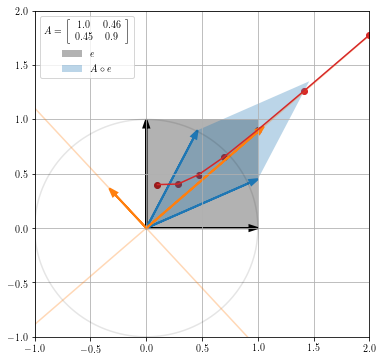

In [17]:
A = np.array([[1,.46],
              [.45,.9]])
u0 = [0.1,.4]
traj = simulate(A,u0, T=100)
ax = display_transform(A)
display_eigenvectors(A)
display_trajectoire_ee(traj,ax)

Essayons quelques autres matrices... ça ne marche pas toujours !

In [18]:
theta = np.pi/4
M = {
    'A': A,     
'Rotation': np.array([[np.cos(theta),-np.sin(theta)],
                       [np.sin(theta),np.cos(theta)]]),
'Rotation 2': np.array([[0,-1],
                        [1,0]]),
'Regular': np.array([[0,1],
                      [1.1,1.2]]),
'Cisaillement': np.array([[1,1],
                           [0,1]]),
'Flip': np.array([[0,1],
                    [1,0]]),
'Oscillante': np.array([[0,1.05],
                       [1.06,0]]),
}

/home/guilhem/.local/lib/python3.5/site-packages/numpy/core/numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


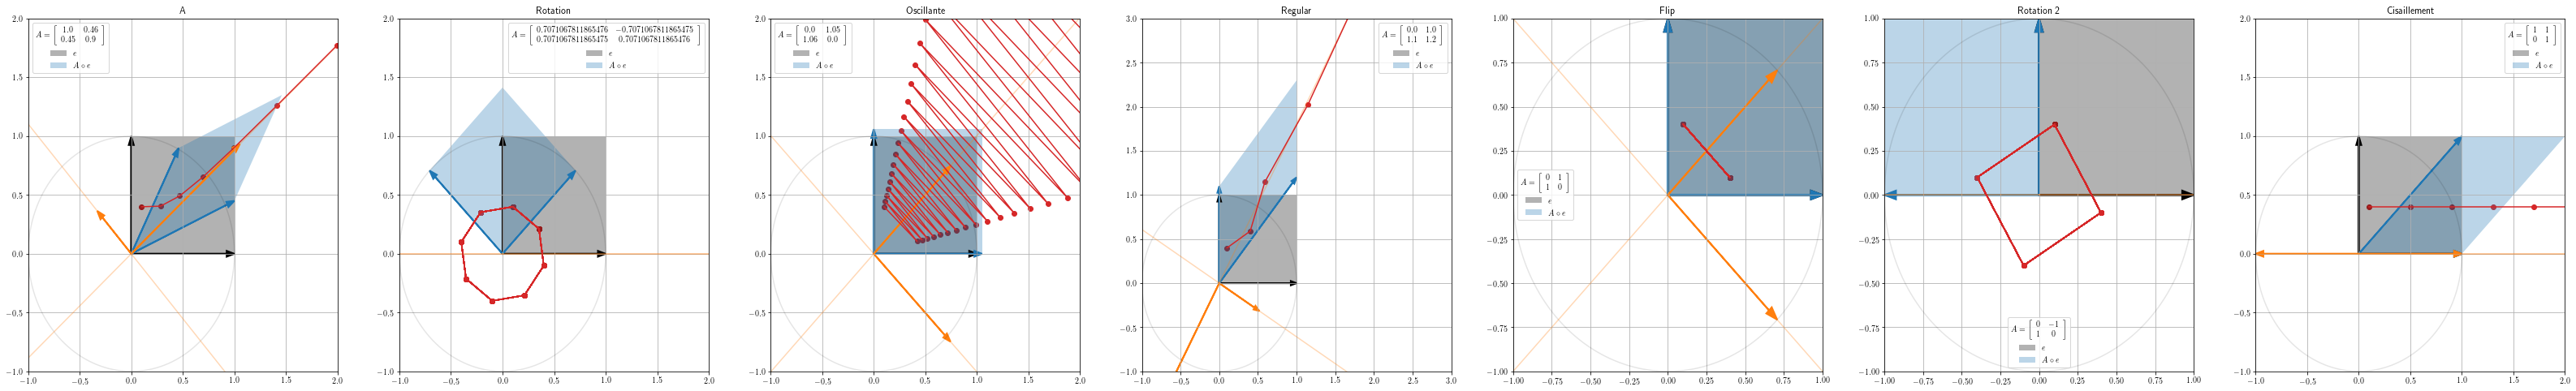

In [19]:
def display_matrices(Mlist, T=100, u0 = [0.1,.4]):
    fig, axes = plt.subplots(1,len(Mlist), figsize=(8*len(Mlist),8))
    for ax,(name,M) in zip(axes,Mlist):
        display_transform(M,ax,title=name)
        display_eigenvectors(M,ax)
        traj = simulate(M, u0,T)
        display_trajectoire_ee(traj,ax)
        
display_matrices(list(M.items()))

### Perron-Frobenius à la rescousse

Le théorème de Perron-Frobenius (dans le cours) donne les conditions dans lesquelles la matrice a une valeur propre dominante:

> **Définition** On dit que la matrice $A$ est positive (noté $A\geq0$) au sens de Perron-Frobenius si  $\forall i,j A_{ij}\geq0$
>
> **Définition** On dit que la matrice $A$ est strictement positive (noté $A>0$) au sens de Perron-Frobenius si  $\forall i,j A_{ij}>0$
>
> **Définition** On dit que la matrice $A$ est régulière (au sens des matrices stochastiques) si il existe un entier $n$ pour lequel $A^n>0$. 



> **Théorème** (*Perron-Frobenius*)

> 1) **Soit** $A\geq0$ (au sens de PF), **Alors** il existe une valeur propre dominante $\lambda_0$ telle que $\forall \lambda \in sp(A), \; |\lambda_0|>|\lambda| $. 

> 2) **Soit** $A\geq0$ (au sens de PF) et régulière **Alors** $\lambda_0$ est de multiplicité 1.

> 3 )**Soit** $A$ une matrice positive et irréductible
>
> **Alors:**
> 
> - $A$ possède une plus grande valeur propre $\lambda_0$. 
> - $\lambda_0$ est réél et de multiplicité 1.
> - Le vecteur propre associé à $\lambda_0$ est réél et à coefficient positifs.

/home/guilhem/.local/lib/python3.5/site-packages/numpy/core/numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


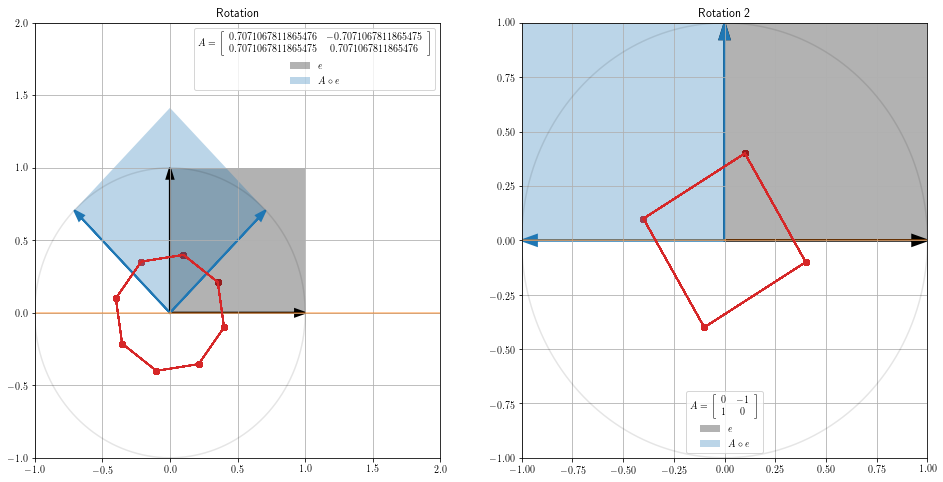

In [20]:
# Les matrices de rotation ne vérifient pas l'hypothèse de positivité de Perron-Frobenius.
display_matrices([(k,M[k]) for k in ('Rotation','Rotation 2')])

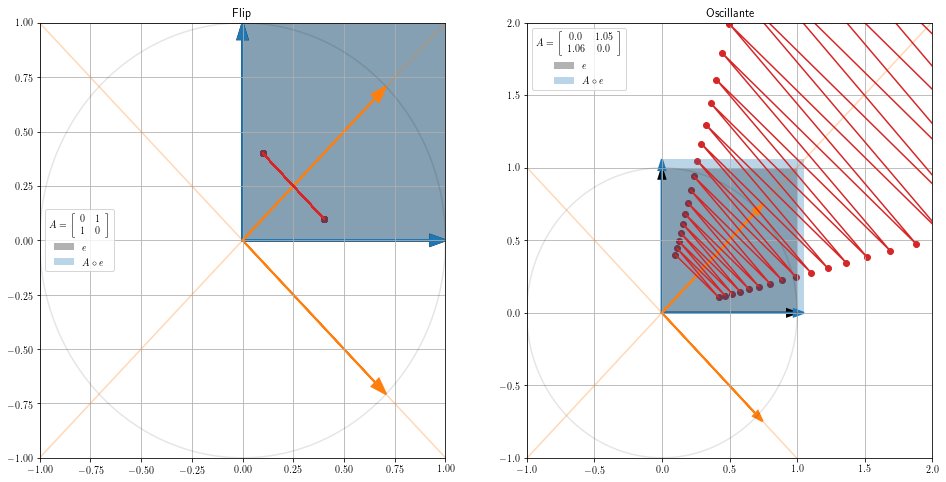

In [21]:
# La matrices flip et oscillantes ne sont pas régulières
display_matrices([(k,M[k]) for k in ('Flip','Oscillante')])